In [245]:
from google.colab import files

uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales (4).csv


In [246]:
!pip install pandas matplotlib seaborn scikit-learn xgboost

In [247]:


import pandas as pd

# Replace with your exact filename if it changed during upload
df = pd.read_csv('supermarket_sales.csv')

# Quick look
df.head()          # first 5 rows
df.info()          # data types + missing values
df.describe()      # stats for numeric columns
df.shape           # number of rows & columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(1000, 17)

In [248]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [250]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [251]:
df.shape

(1000, 17)

In [252]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [253]:
## The Total column is right-skewed (mean > median, long tail to high values), which is typical for sales/house prices/etc.

In [254]:
import pandas as pd

# Assuming you already have: df = pd.read_csv('supermarket_sales.csv')

# Convert Date and Time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time   # keep as time object

# Extract useful features
df['Month']     = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek     # 0 = Monday, 6 = Sunday
df['Hour']      = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

print(df[['Date', 'Month', 'DayOfWeek', 'Hour', 'Sales']].head(8))
print(df['Month'].value_counts())   # should show Jan=Jan=1, Feb=2, Mar=3

        Date  Month  DayOfWeek  Hour     Sales
0 2019-01-05      1          5    13  548.9715
1 2019-03-08      3          4    10   80.2200
2 2019-03-03      3          6    13  340.5255
3 2019-01-27      1          6    20  489.0480
4 2019-02-08      2          4    10  634.3785
5 2019-03-25      3          0    18  627.6165
6 2019-02-25      2          0    14  433.6920
7 2019-02-24      2          6    11  772.3800
Month
1    352
3    345
2    303
Name: count, dtype: int64


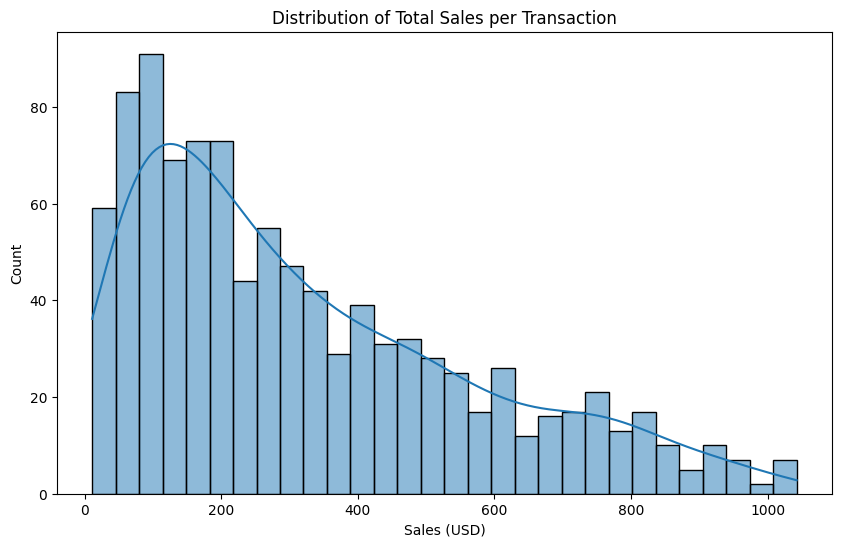

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales per Transaction')
plt.xlabel('Sales (USD)')
plt.ylabel('Count')
plt.show()

In [256]:
## Average Total by Product line (one of the strongest non-trivial signals)

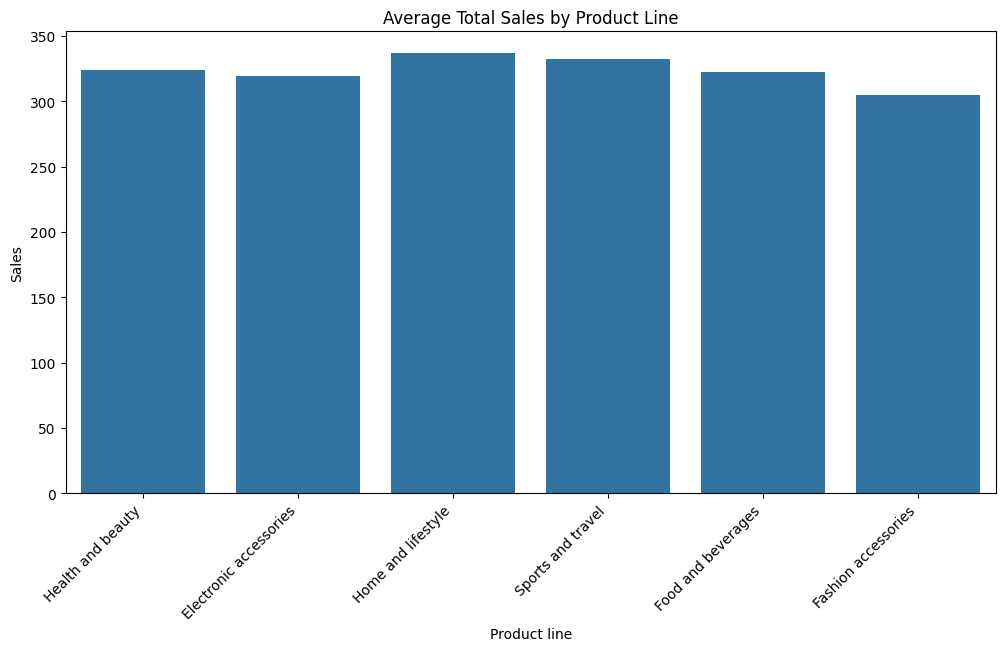

Product line
Home and lifestyle        336.64
Sports and travel         332.07
Health and beauty         323.64
Food and beverages        322.67
Electronic accessories    319.63
Fashion accessories       305.09
Name: Sales, dtype: float64


In [257]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Sales', data=df, estimator='mean', errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Total Sales by Product Line')
plt.show()

# Also print numbers
print(df.groupby('Product line')['Sales'].mean().sort_values(ascending=False).round(2))

In [258]:
## Average Total by Customer type & Gender (business segments)

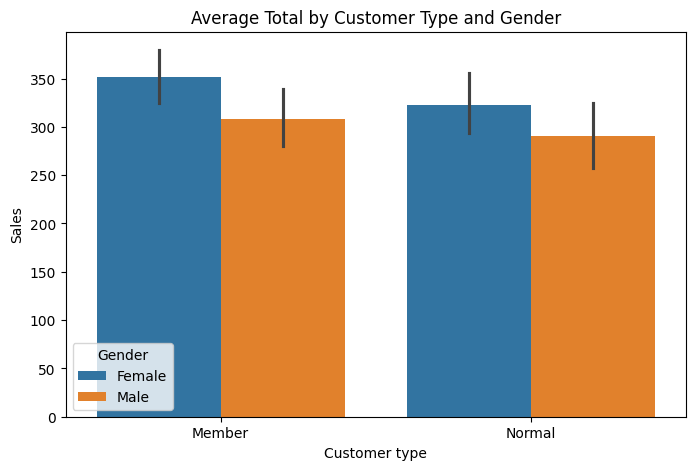

In [259]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer type', y='Sales', hue='Gender', data=df, estimator='mean')
plt.title('Average Total by Customer Type and Gender')
plt.show()

In [260]:
## Cell: Extract Time Features +

In [261]:
# Make sure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])
# The 'Time' column already contains datetime.time objects from previous processing,
# so we don't need to re-parse it here.

# Extract useful features
df['Month']     = df['Date'].dt.month          # 1=Jan, 2=Feb, 3=Mar
df['DayOfWeek'] = df['Date'].dt.dayofweek      # 0=Monday, 6=Sunday
df['Hour']      = df['Time'].apply(lambda x: x.hour) # Extract hour directly from datetime.time objects

# Quick checks
print("Transactions per Month:\n", df['Month'].value_counts().sort_index())
print("\nTransactions per Day of Week:\n", df['DayOfWeek'].value_counts().sort_index())
print("\nTransactions per Hour:\n", df['Hour'].value_counts().sort_index().head(10))  # top hours

# Sample with new columns
print("\nSample rows:")
print(df[['Date', 'Month', 'DayOfWeek', 'Hour', 'Sales', 'Product line', 'Customer type']].head(8))

Transactions per Month:
 Month
1    352
2    303
3    345
Name: count, dtype: int64

Transactions per Day of Week:
 DayOfWeek
0    125
1    158
2    143
3    138
4    139
5    164
6    133
Name: count, dtype: int64

Transactions per Hour:
 Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
Name: count, dtype: int64

Sample rows:
        Date  Month  DayOfWeek  Hour     Sales            Product line  \
0 2019-01-05      1          5    13  548.9715       Health and beauty   
1 2019-03-08      3          4    10   80.2200  Electronic accessories   
2 2019-03-03      3          6    13  340.5255      Home and lifestyle   
3 2019-01-27      1          6    20  489.0480       Health and beauty   
4 2019-02-08      2          4    10  634.3785       Sports and travel   
5 2019-03-25      3          0    18  627.6165  Electronic accessories   
6 2019-02-25      2          0    14  433.6920  Electronic accessories   
7 2019-02-24      2    

In [262]:
## Cell: Average Total by Hour (staffing insight)

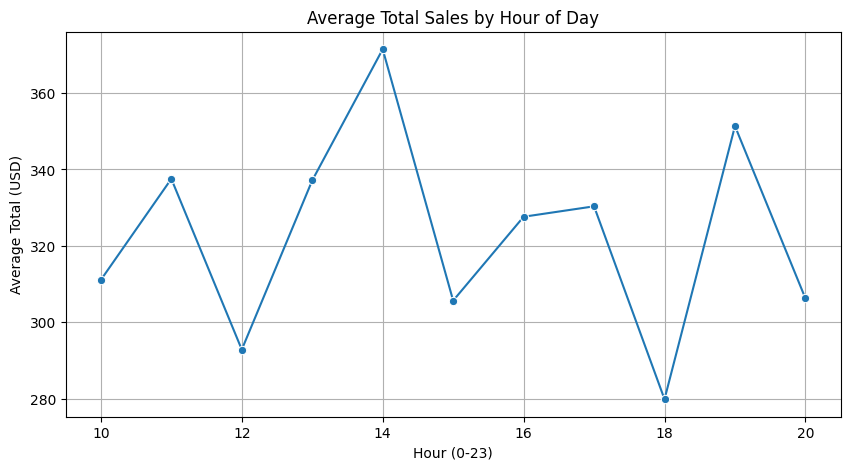

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Sales', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Average Total Sales by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Total (USD)')
plt.grid(True)
plt.show()

In [264]:
## Cell: Average Total by Day of Week


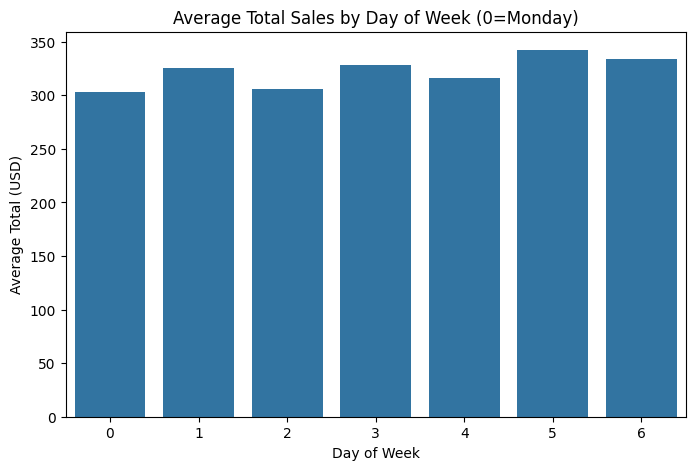

In [265]:
plt.figure(figsize=(8, 5))
sns.barplot(x='DayOfWeek', y='Sales', data=df, estimator='mean', errorbar=None)
plt.title('Average Total Sales by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Average Total (USD)')
plt.show()

## Data Preparation for Modeling

In [266]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [267]:
## 2. Define Features & Target + Drop Leakage Columns


In [268]:
# Target
y = df['Sales']  # or df['Sales'] if that's the column name

# Features: Drop anything derived from Total (leakage!)
drop_cols = ['Invoice ID', 'Date', 'Time', 'Tax 5%', 'cogs', 'gross margin percentage',
             'gross income',  'Sales']  # adjust if 'Sales' is the target name

X = df.drop(columns=drop_cols)

# Keep: Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Payment, Rating, Month, DayOfWeek, Hour

print("Features shape:", X.shape)
print(X.columns.tolist())

Features shape: (1000, 12)
['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment', 'Rating', 'Month', 'DayOfWeek', 'Hour']


In [269]:
# # After fitting the pipeline (or at any point after preprocessor is created)
# feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()
# print("Model expects these columns (after preprocessing):")
# print(feature_names.tolist())

# # Also print raw input columns used during training
# print("\nOriginal training columns:")
# print(X.columns.tolist())

In [270]:
## 3. Log-Transform the Target (to fix skew)


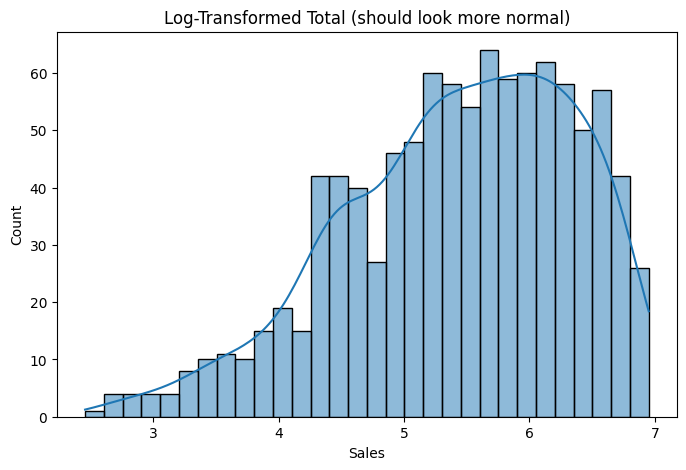

In [271]:
y_log = np.log1p(y)  # log(1 + Total) to handle any zeros (though min is >10)

plt.figure(figsize=(8,5))
sns.histplot(y_log, bins=30, kde=True)
plt.title('Log-Transformed Total (should look more normal)')
plt.show()

In [272]:
## 4. Identify Categorical & Numeric Columns

In [273]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
numeric_cols = ['Unit price', 'Quantity', 'Rating', 'Month', 'DayOfWeek', 'Hour']

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

Categorical: ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
Numeric: ['Unit price', 'Quantity', 'Rating', 'Month', 'DayOfWeek', 'Hour']


In [274]:
## 5. Create Preprocessing + Simple Model Pipeline (Baseline: Linear Regression)

In [275]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)  # keep as-is for now
    ])

# Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data (stratify not needed for regression)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Train
model_pipeline.fit(X_train, y_train_log)

# Predict (in log space)
y_pred_log = model_pipeline.predict(X_test)

# Back-transform to original scale
y_pred = np.expm1(y_pred_log)   # inverse of log1p
y_test = np.expm1(y_test_log)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - RMSE: {rmse:.2f} USD")
print(f"R²: {r2:.4f}")

Linear Regression - RMSE: 99.70 USD
R²: 0.8472


In [276]:
## 1. Try a Non-Linear Model: Random Forest Regressor

In [277]:
from sklearn.ensemble import RandomForestRegressor

# New pipeline with RF
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # reuse your existing preprocessor
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train & predict
rf_pipeline.fit(X_train, y_train_log)
y_pred_log_rf = rf_pipeline.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.2f} USD")
print(f"R²: {r2_rf:.4f}")

Random Forest - RMSE: 8.53 USD
R²: 0.9989


In [278]:
## Even Better: XGBoost (Often the winner for tabular data like this)

In [279]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_pipeline.fit(X_train, y_train_log)
y_pred_log_xgb = xgb_pipeline.predict(X_test)
y_pred_xgb = np.expm1(y_pred_log_xgb)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb:.2f} USD")
print(f"R²: {r2_xgb:.4f}")

XGBoost - RMSE: 6.16 USD
R²: 0.9994


In [280]:
## 3. Feature Importance (from XGBoost or RF — tells us what really drives predictions)


Top 15 Feature Importances:
                                  feature  importance
14                          num__Quantity    0.713607
13                        num__Unit price    0.284361
12                   cat__Payment_Ewallet    0.000322
7    cat__Product line_Food and beverages    0.000203
10    cat__Product line_Sports and travel    0.000164
18                              num__Hour    0.000162
11               cat__Payment_Credit card    0.000143
17                         num__DayOfWeek    0.000137
15                            num__Rating    0.000136
8     cat__Product line_Health and beauty    0.000132
6   cat__Product line_Fashion accessories    0.000126
0                       cat__Branch_Cairo    0.000098
16                             num__Month    0.000095
3                        cat__City_Yangon    0.000085
9    cat__Product line_Home and lifestyle    0.000082


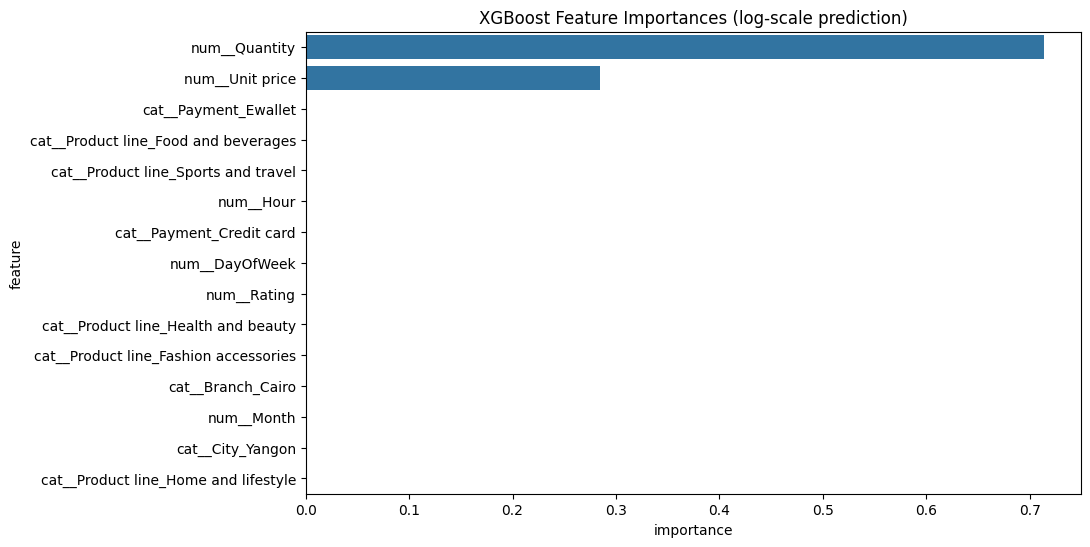

In [281]:
# Get feature names after preprocessing
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Importances
importances = xgb_pipeline.named_steps['regressor'].feature_importances_

# Create DataFrame and sort
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False).head(15)

print("Top 15 Feature Importances:")
print(fi_df)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=fi_df)
plt.title('XGBoost Feature Importances (log-scale prediction)')
plt.show()

In [282]:
## 4. Optional Challenge Version (Realistic Prediction Without Cheating)

In [283]:
# Drop the direct drivers
drop_direct = ['Unit price', 'Quantity']
X_no_direct = X.drop(columns=drop_direct)

# Redefine categorical and numeric columns for the 'no direct drivers' scenario
categorical_cols_nd = categorical_cols
numeric_cols_nd = [col for col in numeric_cols if col not in drop_direct]

# Create a new preprocessor for this scenario
preprocessor_nd = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_nd),
        ('num', 'passthrough', numeric_cols_nd)
    ])

# Create a new XGBoost pipeline with the updated preprocessor
xgb_pipeline_nd = Pipeline(steps=[
    ('preprocessor', preprocessor_nd),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Re-split
X_train_nd, X_test_nd, y_train_log_nd, y_test_log_nd = train_test_split(
    X_no_direct, y_log, test_size=0.2, random_state=42
)

# Train the new pipeline
xgb_pipeline_nd.fit(X_train_nd, y_train_log_nd)

# Predict (in log space)
y_pred_log_xgb_nd = xgb_pipeline_nd.predict(X_test_nd)

# Back-transform to original scale
y_pred_xgb_nd = np.expm1(y_pred_log_xgb_nd)
y_test_nd = np.expm1(y_test_log_nd)

# Evaluate
rmse_xgb_nd = np.sqrt(mean_squared_error(y_test_nd, y_pred_xgb_nd))
r2_xgb_nd = r2_score(y_test_nd, y_pred_xgb_nd)

print(f"XGBoost (no direct drivers) - RMSE: {rmse_xgb_nd:.2f} USD")
print(f"XGBoost (no direct drivers) - R²: {r2_xgb_nd:.4f}")

XGBoost (no direct drivers) - RMSE: 296.71 USD
XGBoost (no direct drivers) - R²: -0.3532


In [284]:
# After fitting the pipeline (or at any point after preprocessor is created)
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()
print("Model expects these columns (after preprocessing):")
print(feature_names.tolist())

# Also print raw input columns used during training
print("\nOriginal training columns:")
print(X.columns.tolist())

Model expects these columns (after preprocessing):
['cat__Branch_Cairo', 'cat__Branch_Giza', 'cat__City_Naypyitaw', 'cat__City_Yangon', 'cat__Customer type_Normal', 'cat__Gender_Male', 'cat__Product line_Fashion accessories', 'cat__Product line_Food and beverages', 'cat__Product line_Health and beauty', 'cat__Product line_Home and lifestyle', 'cat__Product line_Sports and travel', 'cat__Payment_Credit card', 'cat__Payment_Ewallet', 'num__Unit price', 'num__Quantity', 'num__Rating', 'num__Month', 'num__DayOfWeek', 'num__Hour']

Original training columns:
['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment', 'Rating', 'Month', 'DayOfWeek', 'Hour']


## What You Can Do Next in Your Notebook

In [285]:
## Confirm the no-direct version is clean (no Quantity or Unit price leakage):

In [286]:
print(X_no_direct.columns.tolist())  # should NOT include 'Unit price' or 'Quantity'

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Rating', 'Month', 'DayOfWeek', 'Hour']


In [287]:
## Re-run XGBoost on clean X_no_direct (if needed) and get new feature importances

In [288]:
# After fixing drop
xgb_pipeline_nd.fit(X_train_nd, y_train_log_nd)
y_pred_log_nd = xgb_pipeline_nd.predict(X_test_nd)
y_pred_nd = np.expm1(y_pred_log_nd)
y_test_nd = np.expm1(y_test_log_nd)

rmse_nd = np.sqrt(mean_squared_error(y_test_nd, y_pred_nd))
r2_nd = r2_score(y_test_nd, y_pred_nd)
print(f"Clean no-direct XGBoost - RMSE: {rmse_nd:.2f}, R²: {r2_nd:.4f}")

# Feature importance again
feature_names = xgb_pipeline_nd.named_steps['preprocessor'].get_feature_names_out()
importances = xgb_pipeline_nd.named_steps['regressor'].feature_importances_
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False).head(15)
print(fi_df)

Clean no-direct XGBoost - RMSE: 296.71, R²: -0.3532
                                  feature  importance
16                              num__Hour    0.079938
10    cat__Product line_Sports and travel    0.077512
12                   cat__Payment_Ewallet    0.075224
15                         num__DayOfWeek    0.075169
13                            num__Rating    0.074567
14                             num__Month    0.073986
9    cat__Product line_Home and lifestyle    0.067662
11               cat__Payment_Credit card    0.062039
5                        cat__Gender_Male    0.061010
3                        cat__City_Yangon    0.060602
6   cat__Product line_Fashion accessories    0.060273
7    cat__Product line_Food and beverages    0.059912
8     cat__Product line_Health and beauty    0.049941
4               cat__Customer type_Normal    0.047230
1                        cat__Branch_Giza    0.039506


In [289]:
## Save your best model (the full one):Python

In [290]:
import joblib
joblib.dump(xgb_pipeline, 'supermarket_sales_xgb_full.pkl')
print("Model saved!")

Model saved!


In [291]:
## Simple prediction function (for fun/demo)

In [292]:
def predict_total(new_data_dict):
    # Ensure the new data has the same columns and order as the training data (X)
    new_data_series = pd.Series(new_data_dict)
    df_new = pd.DataFrame([new_data_series.reindex(X.columns)])

    pred_log = xgb_pipeline.predict(df_new)
    return np.expm1(pred_log)[0]

# Example
example = {
    'Branch': 'A', 'City': 'Yangon', 'Customer type': 'Member',
    'Gender': 'Female', 'Product line': 'Health and beauty',
    'Payment': 'Cash', 'Rating': 8.5, 'Month': 3, 'DayOfWeek': 5, 'Hour': 13,
    'Unit price': 50.0, 'Quantity': 5
}
print("Predicted Total:", predict_total(example))

Predicted Total: 256.50723


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Step-by-Step: Create a Simple Streamlit Prediction Demo in Colab

In [293]:
## 1. Install Streamlit & ngrok (one-time in your notebook)

In [294]:
!pip install streamlit -q
!pip install pyngrok -q

In [295]:
## 2. Save your best model (if not already done)

In [296]:
# import joblib

# # Assuming xgb_pipeline is your best full model (with Unit price & Quantity)
# joblib.dump(xgb_pipeline, 'supermarket_xgb_model.pkl')
# print("Model saved as supermarket_xgb_model.pkl")

In [297]:
## 3. Create the Streamlit app script

In [298]:
%%writefile /content/app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# ───────────── Load model with absolute path ─────────────
MODEL_PATH = "supermarket_sales_xgb_full.pkl"   # ← change if your filename is different

try:
    model = joblib.load(MODEL_PATH)
except Exception as e:
    st.error(f"Failed to load model: {str(e)}")
    st.stop()

# ───────────── App Header ─────────────
st.title("🛒 Supermarket Sales Predictor")
st.markdown("""
This demo uses an XGBoost model trained on 1,000 transactions to estimate **Total Sales** (incl. 5% tax).
Try different customer profiles, times, and products!
""")

st.divider()

# ───────────── Inputs ─────────────
st.subheader("Enter Transaction Details")

col1, col2 = st.columns(2)

with col1:
    branch = st.selectbox("Branch", ["A", "B", "C"])
    city = st.selectbox("City", ["Yangon", "Mandalay", "Naypyitaw"])
    customer_type = st.selectbox("Customer type", ["Member", "Normal"])
    gender = st.selectbox("Gender", ["Male", "Female"])
    product_line = st.selectbox("Product line", [
        "Health and beauty", "Electronic accessories", "Home and lifestyle",
        "Sports and travel", "Food and beverages", "Fashion accessories"
    ])
    payment = st.selectbox("Payment", ["Cash", "Credit card", "Ewallet"])

with col2:
    unit_price = st.number_input("Unit price", min_value=10.0, max_value=100.0, value=55.0, step=0.1)
    quantity = st.number_input("Quantity", min_value=1, max_value=10, value=5, step=1)
    rating = st.slider("Rating", 1.0, 10.0, 7.0, step=0.1)
    hour = st.slider("Hour (0-23)", 0, 23, 14)
    day_of_week = st.slider("DayOfWeek (0=Mon, 6=Sun)", 0, 6, 3)
    month = st.slider("Month (1-3)", 1, 3, 2)

# ───────────── Prepare input exactly as model expects ─────────────
expected_columns = [
    'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
    'Unit price', 'Quantity', 'Rating', 'Month', 'DayOfWeek', 'Hour'
]

input_dict = {
    'Branch': branch,
    'City': city,
    'Customer type': customer_type,
    'Gender': gender,
    'Product line': product_line,
    'Payment': payment,
    'Unit price': unit_price,
    'Quantity': quantity,
    'Rating': rating,
    'Month': month,
    'DayOfWeek': day_of_week,
    'Hour': hour
}

input_data = pd.DataFrame([input_dict])[expected_columns]

# ───────────── Predict ─────────────
if st.button("🔮 Predict Total Sales", type="primary"):
    with st.spinner("Predicting..."):
        try:
            pred_log = model.predict(input_data)
            pred_total = np.expm1(pred_log)[0]

            # Show prediction + range side-by-side
            col_pred, col_range = st.columns([3, 2])
            with col_pred:
                st.success(f"**Predicted Total: ${pred_total:.2f}**")
            with col_range:
                st.info(f"**Rough range**: ${pred_total * 0.8:.2f} – ${pred_total * 1.2:.2f}\n"
                        f"(simple ±20% estimate)")

            st.balloons()

        except Exception as e:
            st.error(f"Prediction failed: {str(e)}")
            st.info("This usually means input format doesn't match what the model was trained on.")

Overwriting /content/app.py


In [299]:
## 4. Run the Streamlit app in Colab (using ngrok tunnel)

In [300]:
from pyngrok import ngrok

# Kill any previous tunnels (optional, clean start)
!killall ngrok 2>/dev/null

# IMPORTANT: Authenticate ngrok. Replace 'YOUR_AUTHTOKEN' with your actual ngrok authtoken.
# You can get one from: https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("39z1XASo84nT7rLwmGpbihex7xC_7747HhfeKGf2cfuKneP2") # <-- Replace 'YOUR_AUTHTOKEN' here!

# Start tunnel
public_url = ngrok.connect(8501)
print(f"Streamlit App is running at: {public_url}")

# Run Streamlit
!streamlit run app.py &>/dev/null&

Streamlit App is running at: NgrokTunnel: "https://elvin-couth-summer.ngrok-free.dev" -> "http://localhost:8501"


In [301]:
!ls -lh /content/supermarket_xgb_model.pkl

ls: cannot access '/content/supermarket_xgb_model.pkl': No such file or directory


In [303]:
#'supermarket_sales_xgb_full.pkl